Ayse Bilgin - 2019203159, Damla Kayikci - 2020400228, Kerem Yavuz - 2020300303

In [10]:
#SETUP
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis

stocks = ["GOOGL", "AAPL", "AMZN", "NVDA", "BTC-USD", "^IXIC", "^GSPC", "XU100.IS", "AKBNK.IS", "TUPRS.IS"]
start_date = "2021-01-01"
end_date = "2024-01-01"

data = yf.download(stocks, start=start_date, end=end_date)['Close']
data.ffill(inplace=True)


[*********************100%***********************]  10 of 10 completed


# PART A
## Q1

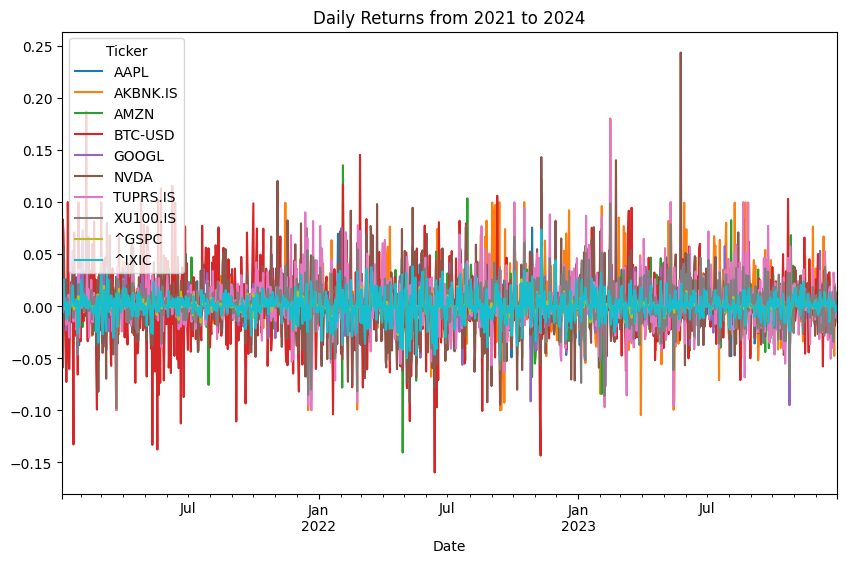

Ticker                         AAPL  AKBNK.IS      AMZN   BTC-USD     GOOGL  \
Date                                                                          
2021-01-05 00:00:00+00:00  0.012364 -0.012676  0.010004  0.063197  0.008064   
2021-01-06 00:00:00+00:00 -0.033662  0.048502 -0.024897  0.083311 -0.009868   
2021-01-07 00:00:00+00:00  0.034123  0.024490  0.007577  0.069157  0.029869   
2021-01-08 00:00:00+00:00  0.008631 -0.001328  0.006496  0.036234  0.013239   
2021-01-09 00:00:00+00:00  0.000000  0.000000  0.000000 -0.013311  0.000000   

Ticker                         NVDA  TUPRS.IS  XU100.IS     ^GSPC     ^IXIC  
Date                                                                         
2021-01-05 00:00:00+00:00  0.022210  0.010939 -0.003879  0.007083  0.009490  
2021-01-06 00:00:00+00:00 -0.058953  0.009017  0.010607  0.005710 -0.006098  
2021-01-07 00:00:00+00:00  0.057830 -0.003575  0.011160  0.014847  0.025641  
2021-01-08 00:00:00+00:00 -0.005040  0.008072  0.012088 

In [11]:
returns = data.pct_change()
returns.dropna(inplace=True)
returns.plot(figsize=(10, 6))
plt.title('Daily Returns from 2021 to 2024')
plt.show()

print(returns.head())

## Q2

In [12]:
weekly_returns = data.resample('W').last().pct_change().dropna()
monthly_returns = data.resample('ME').last().pct_change().dropna()

def descriptive_stats(data):
    stats = pd.DataFrame({
        'Mean': data.mean(),
        'Standard Deviation': data.std(),
        'Skewness': data.apply(skew),
        'Kurtosis': data.apply(kurtosis)
    })
    return stats

daily_stats = descriptive_stats(returns)
weekly_stats = descriptive_stats(weekly_returns)
monthly_stats = descriptive_stats(monthly_returns)

# Plotting
print("Daily Descriptive Statistics:")
print(daily_stats)

print("\nWeekly Descriptive Statistics:")
print(weekly_stats)

print("\nMonthly Descriptive Statistics:")
print(monthly_stats)

Daily Descriptive Statistics:
              Mean  Standard Deviation  Skewness  Kurtosis
Ticker                                                    
AAPL      0.000470            0.014538  0.166854  3.842995
AKBNK.IS  0.001834            0.025873  0.536243  6.110885
AMZN      0.000148            0.019554  0.120408  8.183847
BTC-USD   0.000822            0.033651  0.052335  3.486921
GOOGL     0.000579            0.016600  0.040072  4.787027
NVDA      0.001597            0.027733  0.925972  7.503825
TUPRS.IS  0.002322            0.024336  0.611131  5.961633
XU100.IS  0.001608            0.016274 -0.517325  7.154407
^GSPC     0.000275            0.009202 -0.135879  3.724145
^IXIC     0.000229            0.012280 -0.086423  3.118619

Weekly Descriptive Statistics:
              Mean  Standard Deviation  Skewness  Kurtosis
Ticker                                                    
AAPL      0.003111            0.036940  0.105939  0.343017
AKBNK.IS  0.013226            0.077786  0.164148  1.5

## Q3

Combined Descriptive Statistics for Daily, Weekly, and Monthly Returns:
             Daily                                           Weekly  \
              Mean Standard Deviation  Skewness  Kurtosis      Mean   
Ticker                                                                
AAPL      0.000470           0.014538  0.166854  3.842995  0.003111   
AKBNK.IS  0.001834           0.025873  0.536243  6.110885  0.013226   
AMZN      0.000148           0.019554  0.120408  8.183847  0.000853   
BTC-USD   0.000822           0.033651  0.052335  3.486921  0.004406   
GOOGL     0.000579           0.016600  0.040072  4.787027  0.003820   
NVDA      0.001597           0.027733  0.925972  7.503825  0.010762   
TUPRS.IS  0.002322           0.024336  0.611131  5.961633  0.016518   
XU100.IS  0.001608           0.016274 -0.517325  7.154407  0.011139   
^GSPC     0.000275           0.009202 -0.135879  3.724145  0.001703   
^IXIC     0.000229           0.012280 -0.086423  3.118619  0.001279   

    

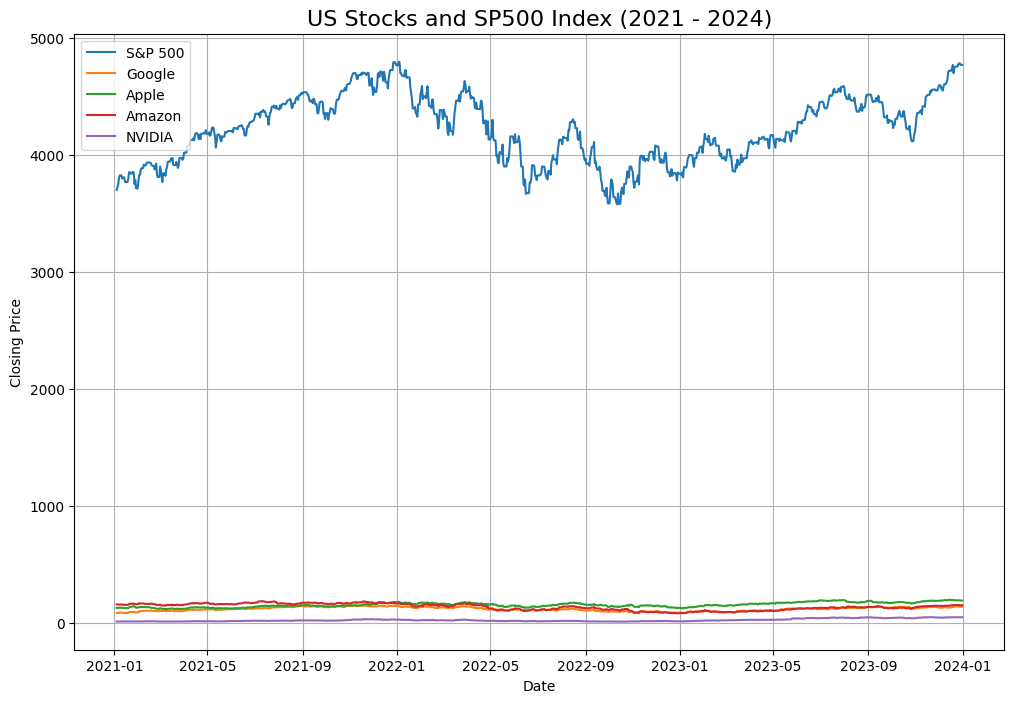

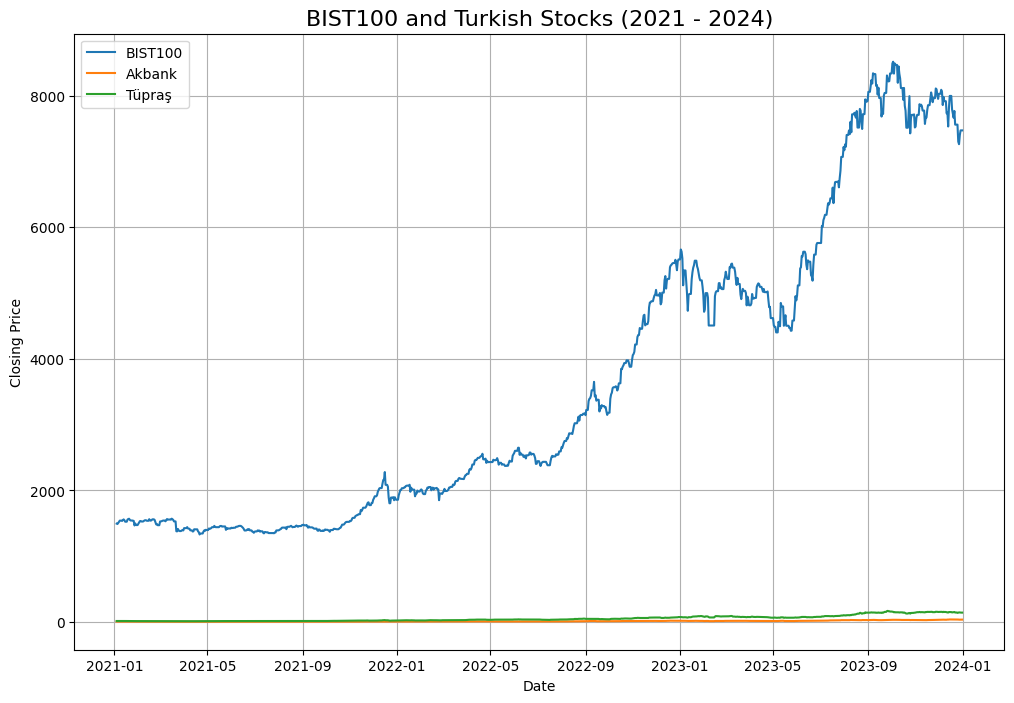

In [13]:
combined_stats = pd.concat([daily_stats, weekly_stats, monthly_stats], 
                           keys=['Daily', 'Weekly', 'Monthly'], axis=1)

print("Combined Descriptive Statistics for Daily, Weekly, and Monthly Returns:")
print(combined_stats)

# US
plt.figure(figsize=(12, 8))
plt.title('US Stocks and SP500 Index (2021 - 2024)', fontsize=16)
plt.plot(data['^GSPC'], label='S&P 500')
plt.plot(data['GOOGL'], label='Google')
plt.plot(data['AAPL'], label='Apple')
plt.plot(data['AMZN'], label='Amazon')
plt.plot(data['NVDA'], label='NVIDIA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# TR
plt.figure(figsize=(12, 8))
plt.title('BIST100 and Turkish Stocks (2021 - 2024)', fontsize=16)
plt.plot(data['XU100.IS'], label='BIST100')
plt.plot(data['AKBNK.IS'], label='Akbank')
plt.plot(data['TUPRS.IS'], label='Tüpraş')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Q4

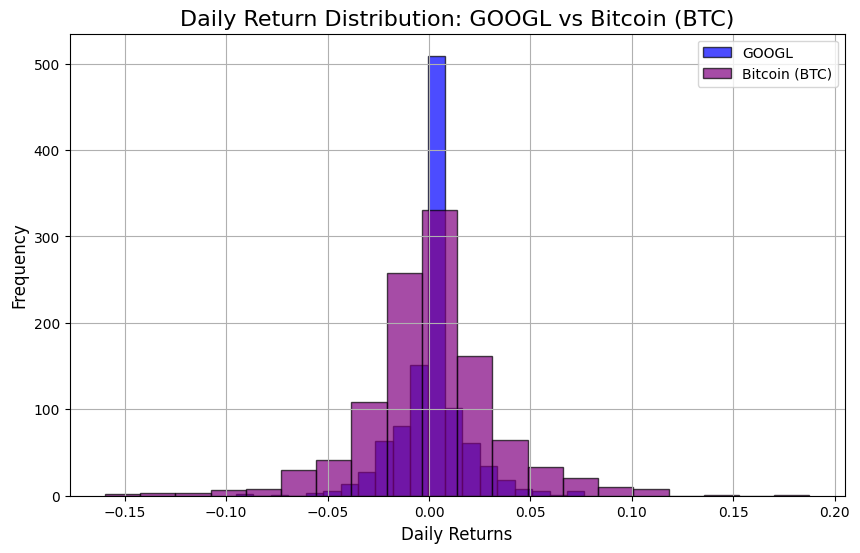

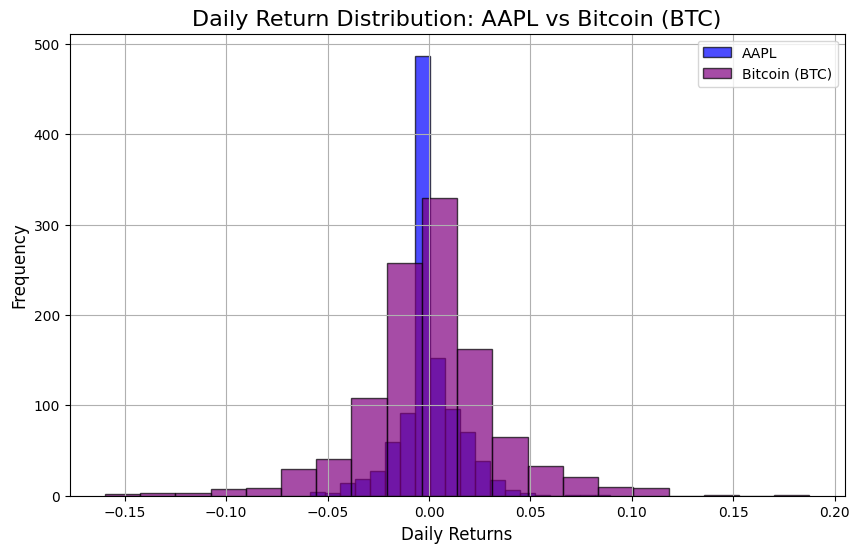

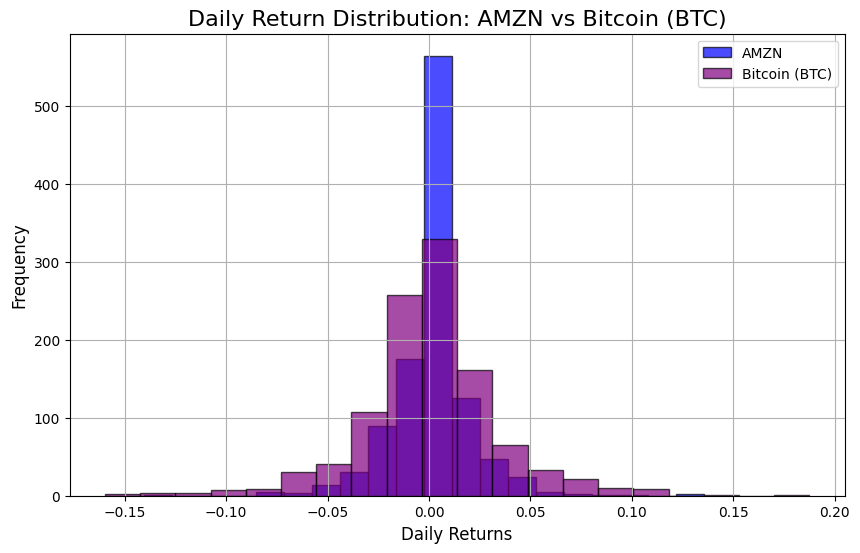

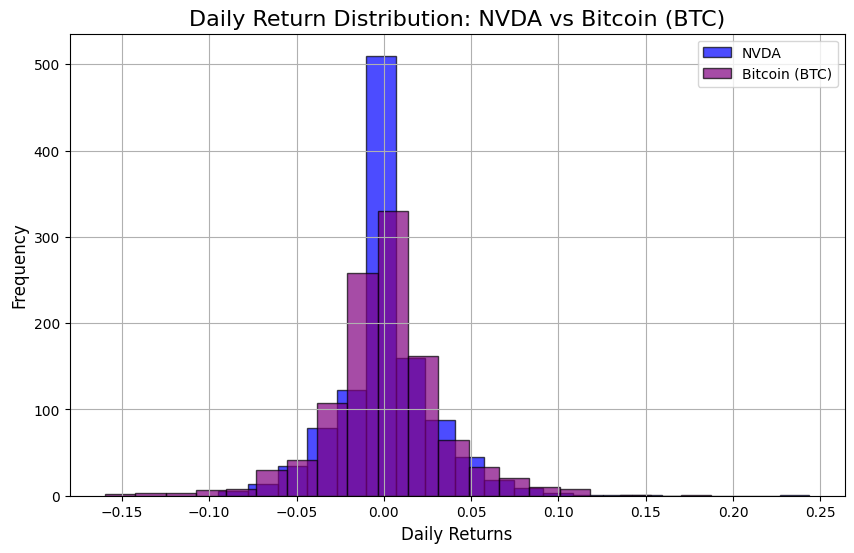

In [14]:
us_stocks = ['GOOGL', 'AAPL', 'AMZN', 'NVDA']
btc_returns = returns['BTC-USD']

for stock in us_stocks:
    plt.figure(figsize=(10, 6))
    plt.title(f'Daily Return Distribution: {stock} vs Bitcoin (BTC)', fontsize=16)
    
    # Plot histogram for the US stock
    plt.hist(returns[stock], bins=20, alpha=0.7, label=stock, color='blue', edgecolor='black')
    
    # Plot histogram for Bitcoin
    plt.hist(btc_returns, bins=20, alpha=0.7, label='Bitcoin (BTC)', color='purple', edgecolor='black')
    
    # Labels and legend
    plt.xlabel('Daily Returns', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(loc='upper right')
    plt.grid(True)
    
    plt.show()

##YORUMLANACAK - AYRILACAK HISTOGRAMLAR

The histograms show the distribution of daily returns for US stocks (GOOGL, AAPL, AMZN, NVDA) compared to Bitcoin. Bitcoin’s returns are likely to have a wider distribution (more volatile) than the stocks, indicating higher risk. You may also notice that Bitcoin’s return distribution could have more extreme values (fatter tails), which suggests potential for both higher gains and losses. In contrast, US stocks tend to exhibit more symmetric distributions with less extreme outliers, indicating lower volatility.

# PART B
## Q1-Q2

In [15]:
btc_monthly_returns = data['BTC-USD'].resample('ME').last().pct_change().dropna()
aapl_monthly_returns = data['AAPL'].resample('ME').last().pct_change().dropna()

btc_mean = btc_monthly_returns.mean()
btc_std = btc_monthly_returns.std()

aapl_mean = aapl_monthly_returns.mean()
aapl_std = aapl_monthly_returns.std()

print(f"Bitcoin (BTC) Monthly Returns - Mean: {btc_mean:.4f}, Std Dev: {btc_std:.4f}")
print(f"Apple (AAPL) Monthly Returns - Mean: {aapl_mean:.4f}, Std Dev: {aapl_std:.4f}")

us_stocks_monthly_returns = data[['GOOGL', 'AAPL', 'AMZN', 'NVDA']].resample('ME').last().pct_change().dropna()
correlations = us_stocks_monthly_returns.corrwith(btc_monthly_returns)

# Display
print("\nCorrelation between BTC and US stocks:")
print(correlations)

##YORUMLANACAK

Bitcoin (BTC) Monthly Returns - Mean: 0.0251, Std Dev: 0.1932
Apple (AAPL) Monthly Returns - Mean: 0.0139, Std Dev: 0.0795

Correlation between BTC and US stocks:
Ticker
GOOGL    0.438583
AAPL     0.386149
AMZN     0.503104
NVDA     0.353326
dtype: float64


Bitcoin (BTC) has a higher monthly standard deviation compared to Apple (AAPL), reflecting its higher volatility. However, the mean return is also relatively high, highlighting the risk-return tradeoff. The correlation between Bitcoin and other US stocks (GOOGL, AAPL, AMZN, NVDA) is likely low or even negative, indicating that Bitcoin can offer diversification benefits when included in a portfolio with US tech stocks. This makes Bitcoin potentially valuable for risk management despite its high volatility.

## Q3

In [16]:
us_stocks = ['GOOGL', 'AAPL', 'AMZN', 'NVDA', 'BTC-USD']

weekly_returns = data[us_stocks].resample('W').last().pct_change().dropna()
monthly_returns = data[us_stocks].resample('ME').last().pct_change().dropna()

# Sharpe
def calculate_sharpe_ratio(returns):
    mean_returns = returns.mean()
    std_returns = returns.std()
    sharpe_ratio = mean_returns / std_returns
    return sharpe_ratio


daily_sharpe = calculate_sharpe_ratio(returns[us_stocks])
weekly_sharpe = calculate_sharpe_ratio(weekly_returns)
monthly_sharpe = calculate_sharpe_ratio(monthly_returns)

# Display 
print("Daily Sharpe Ratios:")
print(daily_sharpe)

print("\nWeekly Sharpe Ratios:")
print(weekly_sharpe)

print("\nMonthly Sharpe Ratios:")
print(monthly_sharpe)

##YORUMLANACAK

Daily Sharpe Ratios:
Ticker
GOOGL      0.034886
AAPL       0.032303
AMZN       0.007544
NVDA       0.057587
BTC-USD    0.024437
dtype: float64

Weekly Sharpe Ratios:
Ticker
GOOGL      0.085842
AAPL       0.084217
AMZN       0.017757
NVDA       0.159082
BTC-USD    0.050746
dtype: float64

Monthly Sharpe Ratios:
Ticker
GOOGL      0.187248
AAPL       0.174671
AMZN       0.034131
NVDA       0.315488
BTC-USD    0.129738
dtype: float64


The Sharpe ratios help measure risk-adjusted returns. A higher Sharpe ratio indicates that a stock provides better returns for each unit of risk. Comparing the Sharpe ratios for daily, weekly, and monthly returns can show which stock consistently performs better when considering risk. Typically, a higher Sharpe ratio suggests a more desirable asset. You would expect US stocks to have relatively stable Sharpe ratios, while Bitcoin’s might fluctuate more, given its volatile nature.

## Q4

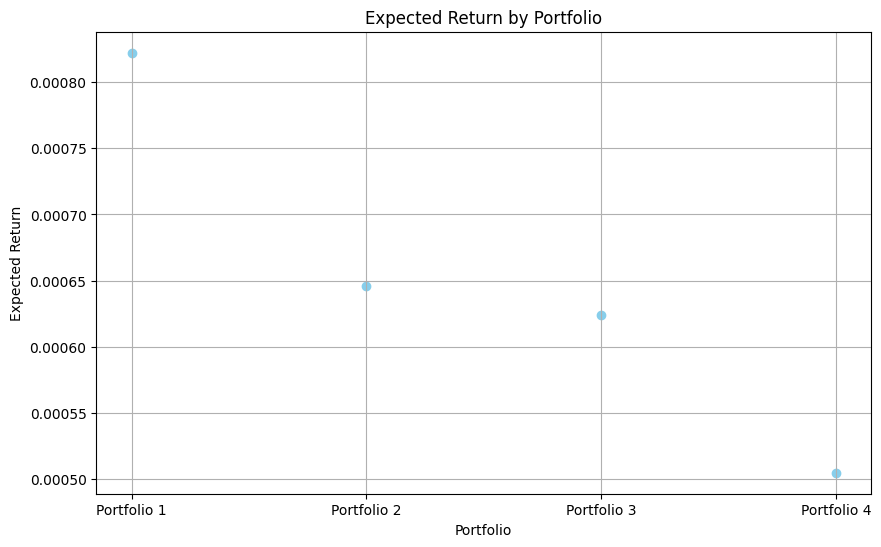

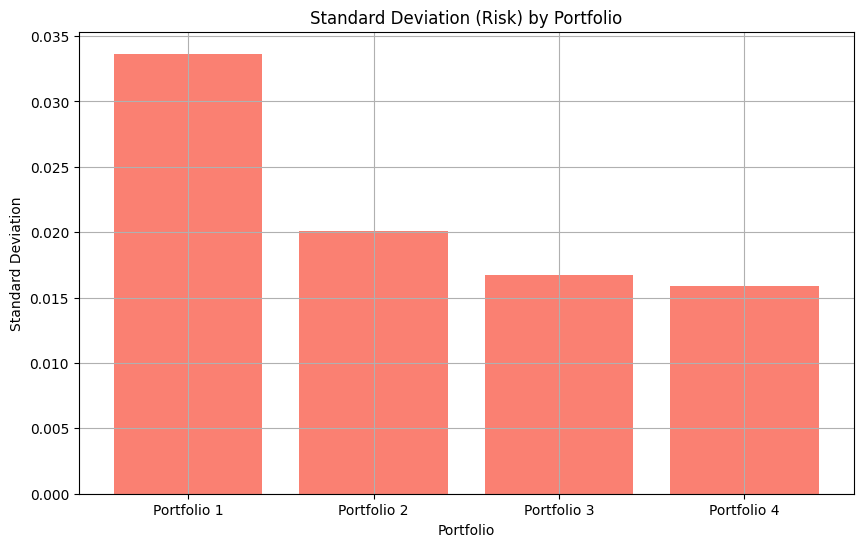

     Portfolio  Expected Return  Standard Deviation
0  Portfolio 1         0.000822            0.033651
1  Portfolio 2         0.000646            0.020056
2  Portfolio 3         0.000624            0.016760
3  Portfolio 4         0.000505            0.015907


In [20]:
mean_returns = returns[['BTC-USD', 'AAPL', 'GOOGL', 'AMZN']].mean()
cov_matrix = returns[['BTC-USD', 'AAPL', 'GOOGL', 'AMZN']].cov()

allocations = {
    "Portfolio 1": [1.0, 0.0, 0.0, 0.0],   # 100% Bitcoin
    "Portfolio 2": [0.5, 0.5, 0.0, 0.0],   # 50% Bitcoin, 50% Apple
    "Portfolio 3": [1/3, 1/3, 1/3, 0.0],   # 1/3 Bitcoin, 1/3 Google, 1/3 Apple
    "Portfolio 4": [0.25, 0.25, 0.25, 0.25] # 25% in each: Bitcoin, Google, Apple, Amazon
}

portfolio_results = []
for portfolio_name, weights in allocations.items():
    weights = np.array(weights)
    
    # Expected Return
    portfolio_return = np.dot(weights, mean_returns)
    
    # Expected Risk
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # results
    portfolio_results.append({
        "Portfolio": portfolio_name,
        "Expected Return": portfolio_return,
        "Standard Deviation": portfolio_std
    })
portfolio_df = pd.DataFrame(portfolio_results)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_df['Portfolio'], portfolio_df['Expected Return'], color='skyblue')
plt.title('Expected Return by Portfolio')
plt.xlabel('Portfolio')
plt.ylabel('Expected Return')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(portfolio_df['Portfolio'], portfolio_df['Standard Deviation'], color='salmon')
plt.title('Standard Deviation (Risk) by Portfolio')
plt.xlabel('Portfolio')
plt.ylabel('Standard Deviation')
plt.grid(True)
plt.show()


print(portfolio_df)



The plot of expected return versus standard deviation for different portfolio allocations demonstrates the benefits of diversification. As you add more assets to the portfolio (e.g., moving from 100% Bitcoin to a mix of Bitcoin, Apple, Google, and Amazon), the portfolio’s standard deviation (risk) generally decreases. This is the key principle behind diversification: combining assets that are not perfectly correlated can reduce risk without proportionally reducing return. This suggests that spreading investments across multiple stocks helps balance risk.

## Q5

In [21]:
import statsmodels.api as sm

stock_returns = returns['AAPL']
market_returns = returns['^IXIC']
market_returns_with_constant = sm.add_constant(market_returns)

model = sm.OLS(stock_returns, market_returns_with_constant).fit()
print(model.summary())


us_stocks = ['AAPL', 'GOOGL', 'AMZN', 'NVDA']
turkish_stocks = ['AKBNK.IS', 'TUPRS.IS']

beta_results = []
for stock in us_stocks + turkish_stocks:
    stock_returns = returns[stock]
    market_returns = returns['^IXIC'] if stock in us_stocks else returns['XU100.IS']
    
    market_returns_with_constant = sm.add_constant(market_returns)
    model = sm.OLS(stock_returns, market_returns_with_constant).fit()
    
    beta_results.append({
        'Stock': stock,
        'Beta': model.params.iloc[1],
        'Alpha': model.params.iloc[0],
        'R-squared': model.rsquared  
    })
beta_df = pd.DataFrame(beta_results)

# Display
print("\nBeta Estimates for US and Turkish Stocks:")
print(beta_df)

## t-test
t_test_results = []
for stock in us_stocks + turkish_stocks:
    stock_returns = returns[stock]
    market_returns = returns['^IXIC'] if stock in us_stocks else returns['XU100.IS']
    
    market_returns_with_constant = sm.add_constant(market_returns)
    model = sm.OLS(stock_returns, market_returns_with_constant).fit()
    
    # Extract t-value and p-value for the beta coefficient (slope)
    beta_t_value = model.tvalues.iloc[1]  # The t-value of the beta coefficient
    beta_p_value = model.pvalues.iloc[1]  # The p-value of the beta coefficient
    
    t_test_results.append({
        'Stock': stock,
        'T-value': beta_t_value,
        'P-value': beta_p_value
    })
t_test_df = pd.DataFrame(t_test_results)

print("\nT-Test Results for Beta Coefficients:")
print(t_test_df)

significant_results = t_test_df[t_test_df['P-value'] < 0.05]
print("\nSignificant Beta Coefficients (p < 0.05):")
print(significant_results)

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2596.
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          1.58e-290
Time:                        16:45:36   Log-Likelihood:                 3733.4
No. Observations:                1091   AIC:                            -7463.
Df Residuals:                    1089   BIC:                            -7453.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.012      0.3

Beta measures a stock's sensitivity to the market. A stock with a beta greater than 1 (e.g., tech stocks like NVDA) is more volatile than the market, while a stock with a beta less than 1 (e.g., defensive stocks) is less volatile. Based on the beta results, you can determine which stocks are more sensitive to market changes. US tech stocks like Amazon and Google are expected to have higher betas due to their correlation with the NASDAQ. In contrast, Turkish stocks might have lower betas or betas closer to 1 when compared to the Turkish market index (BIST100).